# Dependency code

In [1]:
import imp
import os
import sys
import numpy as np
import glob
import cmdbench

fp, pathname, description = imp.find_module('benchmark', ['../lib'])
benchmark = imp.load_module('benchmark', fp, pathname, description)

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

# Software versions

In [2]:
!skesa --version

skesa --version 

SKESA 2.4.0


# Benchmarking

## Input data and constants

In [3]:
input_dir = '../data/input-files/reads'
input_files_1 = [os.path.basename(f) for f in glob.glob(f'{input_dir}/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_files_1]
input_samples.sort()
print(input_samples)

skesa_out = 'skesa-output'

nproc = 32

sample_sizes = [1,10,20,30,40,50,60,70,80]
#sample_sizes = [1,5,10]

benchmark.create_folder_if_doesnt_exist(skesa_out)

['2014C-3598', '2014C-3599', '2014C-3600', '2014C-3655', '2014C-3656', '2014C-3840', '2014C-3850', '2014C-3857', '2014C-3907', '2014D-0067', '2014D-0068', '2014D-0070', '2014D-0189', 'CFSAN002349', 'CFSAN023463', 'CFSAN023464', 'CFSAN023465', 'CFSAN023466', 'CFSAN023467', 'CFSAN023468', 'CFSAN023469', 'CFSAN023470', 'CFSAN023471', 'D5663', 'D7316', 'D7319', 'D7320', 'D7321', 'D7322', 'D7323', 'D7324', 'D7327', 'D7328', 'D7329', 'D7330', 'D7331', 'D7333', 'D7334', 'MOD1_LS1000', 'MOD1_LS1003', 'MOD1_LS1004', 'MOD1_LS1005', 'MOD1_LS1006', 'MOD1_LS1008', 'MOD1_LS1009', 'MOD1_LS1010', 'MOD1_LS1011', 'MOD1_LS982', 'MOD1_LS985', 'MOD1_LS989', 'MOD1_LS994', 'MOD1_LS995', 'MOD1_LS996', 'MOD1_LS997', 'MOD1_LS998', 'PNUSA000194', 'PNUSA000195', 'PNUSA000196', 'PNUSAL000730', 'PNUSAL000870', 'PNUSAL000957', 'PNUSAL001024', 'SIM_CFSAN000189', 'SIM_CFSAN000191', 'SIM_CFSAN000211', 'SIM_CFSAN000212', 'SIM_CFSAN000228', 'SIM_CFSAN000661', 'SIM_CFSAN000669', 'SIM_CFSAN000700', 'SIM_CFSAN000752', 'SIM_

## Benchmark functions

In [4]:
def reset_func():
    benchmark.clean_if_exists(skesa_out)
        
def sampling_func(sample_size):
    samples = input_samples[:sample_size]
    return samples

## Benchmark

In [5]:
assembly_command = {
    "command": f"skesa --fastq {input_dir}/%_1.fastq.gz,{input_dir}/%_2.fastq.gz --cores 1 --contigs_out {skesa_out}/%.fasta",
    "parallel_args": f"-j {nproc} -I%"
}

# active_output_print: prints stdout and stderr on every iteration
multibench_results, debug_str = benchmark.multibench.multi_cmdbench({
    "assembly": [assembly_command]
    },
    reset_func = reset_func, iterations = 1, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results = benchmark.benchmark_list_to_results, active_output_print = True
)

>>>>>>>>>>>>>
parallel -j 32 -I% skesa --fastq ../data/input-files/reads/%_1.fastq.gz,../data/input-files/reads/%_2.fastq.gz --cores 1 --contigs_out skesa-output/%.fasta ::: 2014C-3598

STDOUT: 
-------------
STDERR: skesa --fastq ../data/input-files/reads/2014C-3598_1.fastq.gz,../data/input-files/reads/2014C-3598_2.fastq.gz --cores 1 --contigs_out skesa-output/2014C-3598.fasta 

Total mates: 1039480 Paired reads: 519740
Reads acquired in  10.859279s wall, 10.670000s user + 0.180000s system = 10.850000s CPU (99.9%)

Kmer len: 19
Raw kmers: 224534807 Memory needed (GB): 4.31107 Memory available (GB): 29.9024 1 cycle(s) will be performed
Distinct kmers: 64335
Kmer count in  52.465935s wall, 48.340000s user + 4.650000s system = 52.990000s CPU (101.0%)
Uniq kmers merging in  0.007301s wall, 0.000000s user + 0.010000s system = 0.010000s CPU (137.0%)
Adapters: 0 Reads before: 1039480 Sequence before: 243237797 Reads after: 1039480 Sequence after: 243237797 Reads clipped: 0
Adapters clipped i

# Save and reload results

In [6]:
save_path = "multibench_results.txt"

samples_per_sample_size = []
for sample_size in sample_sizes:
        samples_per_sample_size.append(input_samples[:sample_size])

benchmark.multibench.save_multibench_results(multibench_results, samples_per_sample_size, save_path)

multibench_results, samples_per_sample_size = benchmark.multibench.read_multibench_results(save_path)
print(samples_per_sample_size)

[['2014C-3598'], ['2014C-3598,', '2014C-3599,', '2014C-3600,', '2014C-3655,', '2014C-3656,', '2014C-3840,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014D-0067'], ['2014C-3598,', '2014C-3599,', '2014C-3600,', '2014C-3655,', '2014C-3656,', '2014C-3840,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014D-0067,', '2014D-0068,', '2014D-0070,', '2014D-0189,', 'CFSAN002349,', 'CFSAN023463,', 'CFSAN023464,', 'CFSAN023465,', 'CFSAN023466,', 'CFSAN023467,', 'CFSAN023468'], ['2014C-3598,', '2014C-3599,', '2014C-3600,', '2014C-3655,', '2014C-3656,', '2014C-3840,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014D-0067,', '2014D-0068,', '2014D-0070,', '2014D-0189,', 'CFSAN002349,', 'CFSAN023463,', 'CFSAN023464,', 'CFSAN023465,', 'CFSAN023466,', 'CFSAN023467,', 'CFSAN023468,', 'CFSAN023469,', 'CFSAN023470,', 'CFSAN023471,', 'D5663,', 'D7316,', 'D7319,', 'D7320,', 'D7321,', 'D7322,', 'D7323'], ['2014C-3598,', '2014C-3599,', '2014C-3600,', '2014C-3655,', '2014C-3656,', '2014C-3840,', '2014C-

# Plot

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'runtime': 1459.86, 'memory': 4912766976.0, 'disk_read': 182646164.0, 'disk_write': 17183573.0}, {'runtime': 3353.71, 'memory': 35255185408.0, 'disk_read': 2676476426.0, 'disk_write': 76118347.0}, {'runtime': 3367.65, 'memory': 64164257792.0, 'disk_read': 4754971723.0, 'disk_write': 98956398.0}, {'runtime': 2318.82, 'memory': 64603623424.0, 'disk_read': 9291534422.0, 'disk_write': 79577626.0}, {'runtime': 2249.34, 'memory': 64811339776.0, 'disk_read': 14384103010.0, 'disk_write': 71142415.0}, {'runtime': 2393.43, 'memory': 64726917120.0, 'disk_read': 17350803731.0, 'disk_write': 103810552.0}, {'runtime': 2483.4, 'memory': 64684855296.0, 'disk_read': 20482665612.0, 'disk_write': 115185397.0}, {'runtime': 2516.16, 'memory': 64952614912.0, 'disk_read': 22198885000.0, 'disk_write': 144016703.0}, {'runtime': 2609.84, 'memory': 64720457728.0, 'disk_read': 23920872558.0, 'disk_write': 198029553.0}]


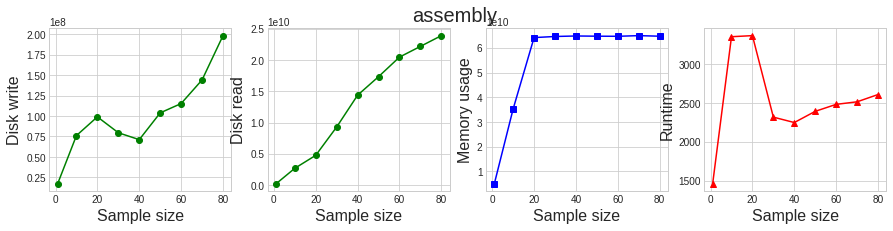

In [8]:
# Indexing Plots
benchmark.multibench.plot_resources(multibench_results, sample_sizes, "assembly")